### Target:
    
    - Add Batch Normalisation to increase efficiency.

### Results:

    - Model has 9.4k parameters.

    - Train Accuracy = 99.72

    - Test Accuracy = 99.16

### Analysis:

    - Model has started overfitting again.

    - Even if train accuracy reaches 100, test can barely reach 99.4 since not all train accuracy can be transferred to test.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [7]:
from model import Model4 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model4                                   [64, 1, 28, 28]           [64, 10]                  --                             --
├─Sequential: 1-1                        [64, 1, 28, 28]           [64, 8, 28, 28]           --                             --
│    └─Conv2d: 2-1                       [64, 1, 28, 28]           [64, 4, 28, 28]           36                          0.38%
│    └─ReLU: 2-2                         [64, 4, 28, 28]           [64, 4, 28, 28]           --                             --
│    └─BatchNorm2d: 2-3                  [64, 4, 28, 28]           [64, 4, 28, 28]           8                           0.08%
│    └─Conv2d: 2-4                       [64, 4, 28, 28]           [64, 8, 28, 28]           288                         3.05%
│    └─ReLU: 2-5                         [64, 8, 28, 28]           [64, 8, 28, 28]           --                

In [8]:
from utils import train, test

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.0048 Batch_id=937 Average Loss=0.1348 Accuracy=95.74: 100%|██████████| 938/938 [00:26<00:00, 35.04it/s]


Test set: Average loss: 0.0429, Accuracy: 9847/10000 (98.47%)

Epoch 2


Train: Batch Loss=0.0649 Batch_id=937 Average Loss=0.0507 Accuracy=98.42: 100%|██████████| 938/938 [00:23<00:00, 40.11it/s]


Test set: Average loss: 0.0408, Accuracy: 9874/10000 (98.74%)

Epoch 3


Train: Batch Loss=0.0019 Batch_id=937 Average Loss=0.0391 Accuracy=98.73: 100%|██████████| 938/938 [00:23<00:00, 40.69it/s]


Test set: Average loss: 0.0354, Accuracy: 9885/10000 (98.85%)

Epoch 4


Train: Batch Loss=0.0287 Batch_id=937 Average Loss=0.0324 Accuracy=98.95: 100%|██████████| 938/938 [00:24<00:00, 38.75it/s]


Test set: Average loss: 0.0306, Accuracy: 9895/10000 (98.95%)

Epoch 5


Train: Batch Loss=0.0041 Batch_id=937 Average Loss=0.0278 Accuracy=99.08: 100%|██████████| 938/938 [00:24<00:00, 37.80it/s]


Test set: Average loss: 0.0292, Accuracy: 9904/10000 (99.04%)

Epoch 6


Train: Batch Loss=0.0418 Batch_id=937 Average Loss=0.0229 Accuracy=99.24: 100%|██████████| 938/938 [00:27<00:00, 33.89it/s]


Test set: Average loss: 0.0351, Accuracy: 9891/10000 (98.91%)

Epoch 7


Train: Batch Loss=0.0045 Batch_id=937 Average Loss=0.0222 Accuracy=99.31: 100%|██████████| 938/938 [00:27<00:00, 33.99it/s]


Test set: Average loss: 0.0304, Accuracy: 9908/10000 (99.08%)

Epoch 8


Train: Batch Loss=0.0028 Batch_id=937 Average Loss=0.0183 Accuracy=99.44: 100%|██████████| 938/938 [00:28<00:00, 33.47it/s]


Test set: Average loss: 0.0324, Accuracy: 9902/10000 (99.02%)

Epoch 9


Train: Batch Loss=0.0040 Batch_id=937 Average Loss=0.0171 Accuracy=99.41: 100%|██████████| 938/938 [00:27<00:00, 34.28it/s]


Test set: Average loss: 0.0305, Accuracy: 9904/10000 (99.04%)

Epoch 10


Train: Batch Loss=0.1191 Batch_id=937 Average Loss=0.0150 Accuracy=99.50: 100%|██████████| 938/938 [00:27<00:00, 34.31it/s]


Test set: Average loss: 0.0286, Accuracy: 9907/10000 (99.07%)

Epoch 11


Train: Batch Loss=0.1808 Batch_id=937 Average Loss=0.0140 Accuracy=99.56: 100%|██████████| 938/938 [00:26<00:00, 35.37it/s]


Test set: Average loss: 0.0308, Accuracy: 9916/10000 (99.16%)

Epoch 12


Train: Batch Loss=0.0033 Batch_id=937 Average Loss=0.0120 Accuracy=99.60: 100%|██████████| 938/938 [00:26<00:00, 35.69it/s]


Test set: Average loss: 0.0317, Accuracy: 9905/10000 (99.05%)

Epoch 13


Train: Batch Loss=0.0024 Batch_id=937 Average Loss=0.0117 Accuracy=99.62: 100%|██████████| 938/938 [00:26<00:00, 35.16it/s]


Test set: Average loss: 0.0355, Accuracy: 9904/10000 (99.04%)

Epoch 14


Train: Batch Loss=0.0007 Batch_id=937 Average Loss=0.0107 Accuracy=99.60: 100%|██████████| 938/938 [00:25<00:00, 36.18it/s]


Test set: Average loss: 0.0331, Accuracy: 9898/10000 (98.98%)

Epoch 15


Train: Batch Loss=0.0002 Batch_id=937 Average Loss=0.0087 Accuracy=99.72: 100%|██████████| 938/938 [00:26<00:00, 34.81it/s]


Test set: Average loss: 0.0337, Accuracy: 9904/10000 (99.04%)



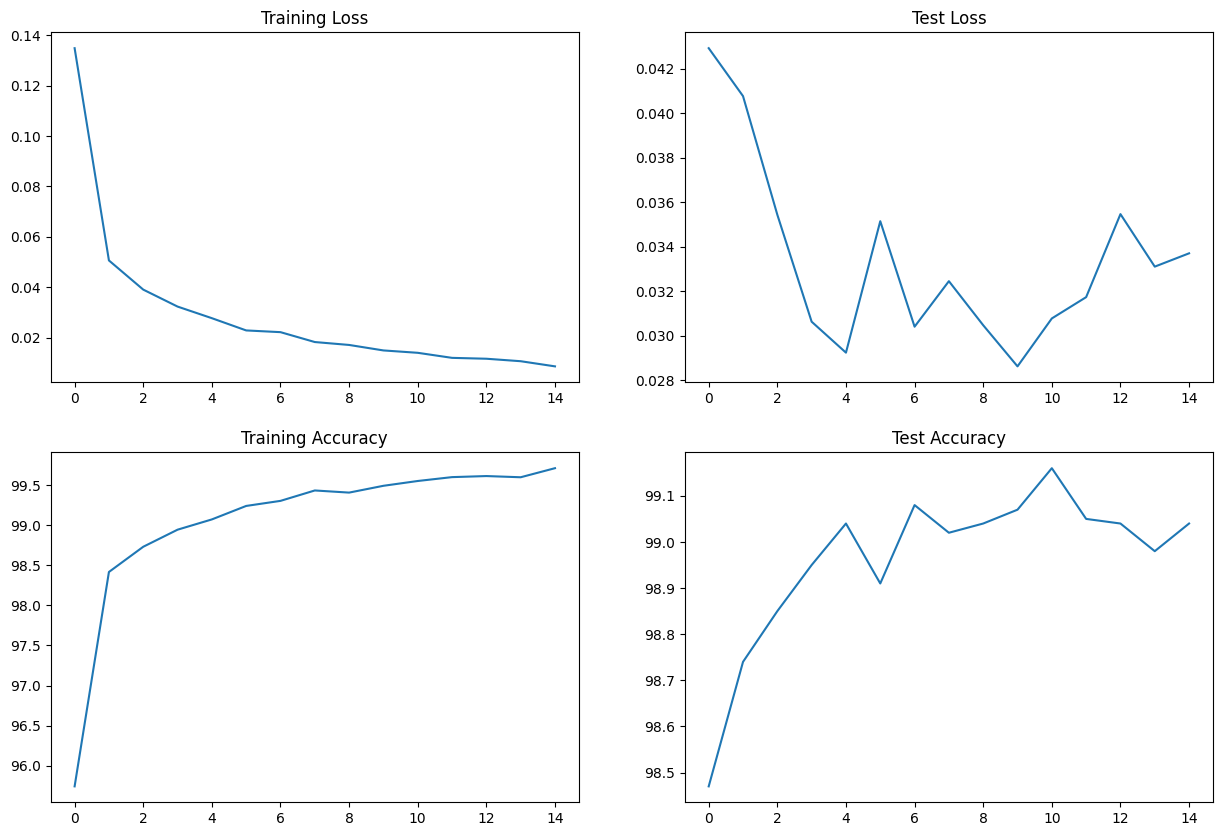

In [10]:
from utils import plot_stats
plot_stats()

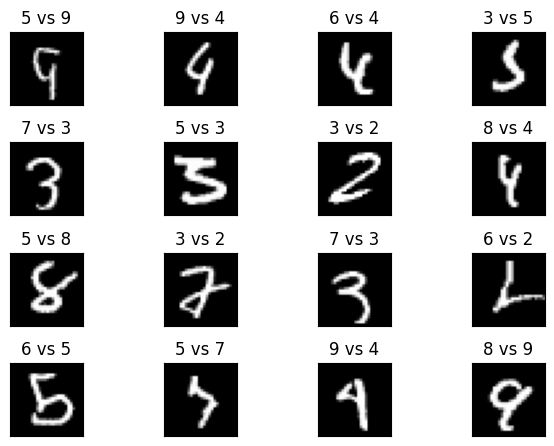

In [11]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual